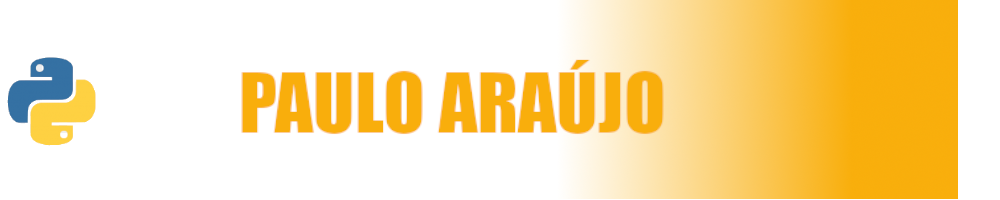

# <span style="color:orange"> Projeto 02 - Análise Exploratória de Dados </span>


## <span style="color:orange"> Índice</span><a name="Contents"></a>
1. [Etapa 1: Entendimento do negócio](#etapa1)
2. [Etapa 2: Entendimento dos dados](#etapa2)
3. [Etapa 3: Preparação dos dados](#etapa3)
4. [Etapa 3: Analisando os dados](#etapa4)


## <span style="color:orange">Etapa 1: Entendimento do negócio</span><a name="etapa1"></a>

<span style="color:gray">**Fonte da base:** Este é um problema de análise exploratória de dados, cuja base de dados encontra-se publicada no **[Kaggle]** neste link [aqui](https://www.kaggle.com/datasets/datacertlaboratoria/projeto-3-segmentao-de-clientes-no-ecommerce).</span> 

<span style="color:gray">O dataset traz o desempenho das vendas de uma companhia do ramo varejista, cujos dados estão dispostos em uma tabela com uma linha para cada fatura e colunas para data da fatura, ID do cliente, país do cliente, quantidade comprada e o valor da compra. 

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


## <span style="color:orange">Etapa 2: Entendimento dos dados</span><a name="etapa2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('vendas-por-fatura.csv')
df_raw.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    25953 non-null  object 
 1   Data da fatura  25953 non-null  object 
 2   ID Cliente      22229 non-null  float64
 3   País            25953 non-null  object 
 4   Quantidade      25953 non-null  int64  
 5   Valor           25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [4]:
df_raw.nunique()

N° da fatura      25900
Data da fatura    23260
ID Cliente         4372
País                 38
Quantidade         1853
Valor             17540
dtype: int64

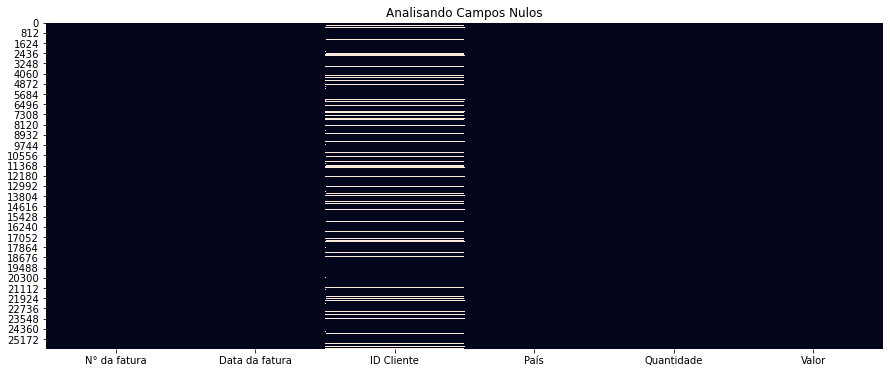

In [5]:
# Analisando dados nulos/vazios
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( df_raw.isnull(), cbar=False );

<div class="aler aler-block alert-warning">
    <b>Os valores nulos que existem na coluna **ID Cliente** não serão 'dropadas', pois em varejo muitas vendas via cupom fiscal podem não ter a identificação formal do cliente, e mesmo assim ainda serem vendas válidas.
Desta forma, vamos preservar esses registros na análise.</b>
</div>

## <span style="color:orange">Etapa 3: Tratando os dados</span><a name="etapa3"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
perc = ((df_raw['ID Cliente'].isnull().sum()) / len(df_raw))

print("{0:.3}% dos registros tem valor nulo na variável 'ID Cliente'.". format((perc)*100))

14.3% dos registros tem valor nulo na variável 'ID Cliente'.


<span style="color:blue">A variável **ID Cliente** apesar de estar tipificada como 'float', na verdade é uma variável categórica, pois representa uma chave de identificação do cliente e sobre a qual não faremos nenhuma operação de cálculo.
<span style="color:blue">Por outro lado, vamos converter a variável **Valor** de objeto para float, pois sobre ela precisamos executar operações de cálculo.</span>

In [7]:
df_raw['Valor'] = df_raw['Valor'].str.replace(',','.')

In [8]:
df_raw["Valor"] = df_raw["Valor"].astype(float)

In [9]:
# Tratando a coluna **Data da fatura** fazendo o split da data e da hora

df_raw[['Data', 'Hora']] = df_raw['Data da fatura'].str.split(' ', 1, expand=True)

In [10]:
df_raw['Data'] = pd.to_datetime(df_raw['Data'])

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    25953 non-null  object        
 1   Data da fatura  25953 non-null  object        
 2   ID Cliente      22229 non-null  float64       
 3   País            25953 non-null  object        
 4   Quantidade      25953 non-null  int64         
 5   Valor           25953 non-null  float64       
 6   Data            25953 non-null  datetime64[ns]
 7   Hora            25953 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.6+ MB


In [12]:
df_raw['mês'] = df_raw['Data'].dt.month
df_raw['ano'] = df_raw['Data'].dt.year
df_raw['dia'] = df_raw['Data'].dt.weekday

In [13]:
df_raw.drop_duplicates()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Data,Hora,mês,ano,dia
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33,2021-03-30,16:14:00,3,2021,1
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73,2021-11-11,11:11:00,11,2021,3
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,-1.45,2021-10-12,11:32:00,10,2021,1
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95,2021-04-06,12:08:00,4,2021,1
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83,2021-10-27,15:33:00,10,2021,2
...,...,...,...,...,...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,-12.70,2021-06-13,10:53:00,6,2021,6
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720.00,2021-05-13,10:44:00,5,2021,3
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,298.78,2021-11-17,13:58:00,11,2021,2
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,1488.00,2021-04-14,12:39:00,4,2021,2


In [14]:
df_raw[df_raw['ID Cliente'].isna()]

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Data,Hora,mês,ano,dia
11,539736,12/21/2020 15:18:00,NaN,United Kingdom,143,1172.46,2020-12-21,15:18:00,12,2020,0
12,537823,12/8/2020 14:25:00,NaN,United Kingdom,1484,6073.71,2020-12-08,14:25:00,12,2020,1
16,542418,1/27/2021 17:39:00,NaN,United Kingdom,-17,0.00,2021-01-27,17:39:00,1,2021,2
21,550759,4/20/2021 12:09:00,NaN,United Kingdom,-7,0.00,2021-04-20,12:09:00,4,2021,1
23,556427,6/10/2021 13:23:00,NaN,United Kingdom,92,435.69,2021-06-10,13:23:00,6,2021,3
...,...,...,...,...,...,...,...,...,...,...,...
25930,539300,12/16/2020 17:31:00,NaN,United Kingdom,38,72.59,2020-12-16,17:31:00,12,2020,2
25932,565303,9/2/2021 12:17:00,NaN,Unspecified,258,286.85,2021-09-02,12:17:00,9,2021,3
25937,543533,2/9/2021 13:00:00,NaN,United Kingdom,155,1001.27,2021-02-09,13:00:00,2,2021,1
25939,C572450,10/24/2021 12:35:00,NaN,United Kingdom,-2,-278.15,2021-10-24,12:35:00,10,2021,6


## <span style="color:orange">Etapa 4: Analisandos os dados</span><a name="etapa4"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

<span style="color:blue">Vamos trabalhar com duas bases derivadas da base principal: **vendas brutas e devoluções**.
<span style="color:blue">Uma vez que a base principal compreende todas as faturas registradas sendo positivas ou negativas (devoluções, cancelamentos, reentradas), indentificadas na variável 'Quantidade' e 'Valor' pelo valores negativos apresentados.</span>

In [15]:
df_vendas = df_raw.loc[ (df_raw['Quantidade'] > 0) & (df_raw['Valor'] > 0)]
df_vendas.describe()

,ID Cliente,Quantidade,Valor,mês,ano,dia
count,18565.000000,20005.000000,20005.000000,20005.000000,20005.000000,20005.000000
mean,15266.260167,279.483079,533.289506,7.377456,2020.922019,2.573557
std,1733.902649,953.773686,1775.377525,3.449487,0.268148,2.055214
min,12346.000000,1.000000,0.380000,1.000000,2020.000000,0.000000
25%,13777.000000,70.000000,152.000000,5.000000,2021.000000,1.000000
50%,15175.000000,151.000000,303.580000,8.000000,2021.000000,2.000000
75%,16779.000000,296.000000,495.000000,11.000000,2021.000000,5.000000
max,18287.000000,80995.000000,168469.600000,12.000000,2021.000000,6.000000


In [16]:
df_cancel = df_raw.loc[ (df_raw['Quantidade'] <= 0) | (df_raw['Valor'] <= 0)]
df_cancel.describe()

,ID Cliente,Quantidade,Valor,mês,ano,dia
count,3664.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000
mean,15096.568231,-69.621553,-154.508425,7.066409,2020.921654,2.362475
std,1721.571492,1481.408504,2578.120804,3.483434,0.268737,2.002878
min,12346.000000,-80995.000000,-168469.600000,1.000000,2020.000000,0.000000
25%,13588.000000,-16.000000,-23.812500,4.000000,2021.000000,1.000000
50%,14913.500000,-4.000000,-7.245000,7.000000,2021.000000,2.000000
75%,16561.500000,-1.000000,0.000000,10.000000,2021.000000,3.000000
max,18282.000000,12540.000000,0.000000,12.000000,2021.000000,6.000000


In [17]:
num_vendas = len(df_vendas)
num_pais = len(df_vendas['País'].unique())

print("A base registra {} vendas, distribuídas em {} país.". format(num_vendas, num_pais))

A base registra 20005 vendas, distribuídas em 38 país.


In [18]:
# distribuição do número de vendas por país
df_vendas['País'].value_counts()

United Kingdom          18060
Germany                   457
France                    393
EIRE                      290
Belgium                    98
Netherlands                94
Spain                      90
Portugal                   58
Australia                  57
Switzerland                54
Finland                    41
Italy                      38
Sweden                     36
Norway                     36
Channel Islands            26
Japan                      20
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                13
Hong Kong                  11
Israel                      8
Iceland                     7
Singapore                   7
Canada                      6
Greece                      5
USA                         5
Malta                       5
European Community          4
Lithuania                   4
Bahrain                     3
United Arab Emirates        3
Czech Repu

<span style="color:blue">Plotando o gráfica fica mais perceptível a alta concentração dos números das vendas em UK.

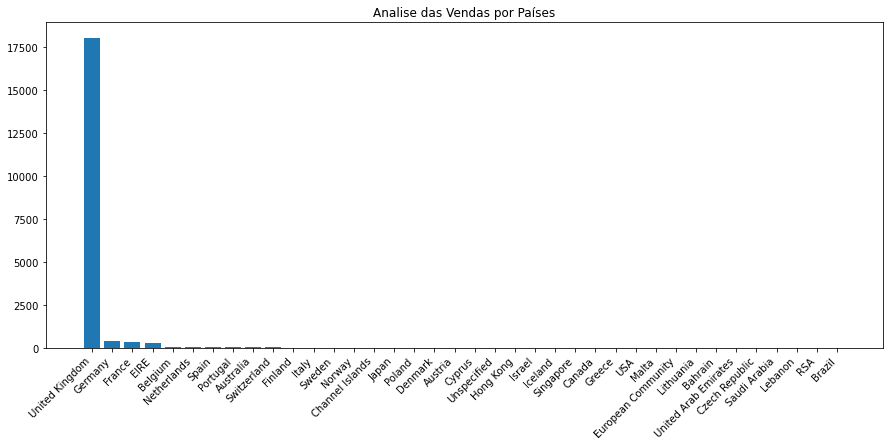

In [19]:
plt.figure( figsize=(15,6) )
plt.title('Analise das Vendas por Países')
plt.bar( df_vendas['País'].value_counts().index, df_vendas['País'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [20]:
df_countries = df_vendas[['País', 'Quantidade', 'Valor', 'ano']]

In [21]:
df_countries.loc[(df_countries['País'] != 'United Kingdom'), 'Região'] = 'Others'
df_countries.loc[(df_countries['País'] == 'United Kingdom'), 'Região'] = 'UK'

<span style="color:blue">Mais de 90% das vendas se concentrar na região de UK. Assim, vamos nos ater ao comportamento das vendas nessa região.

In [22]:
tab = pd.crosstab(df_countries['ano'], df_countries['Região'])
tab.div(tab.sum(axis = 1), axis = 0)

Região,Others,UK
ano,,
2020,0.071795,0.928205
2021,0.099377,0.900623


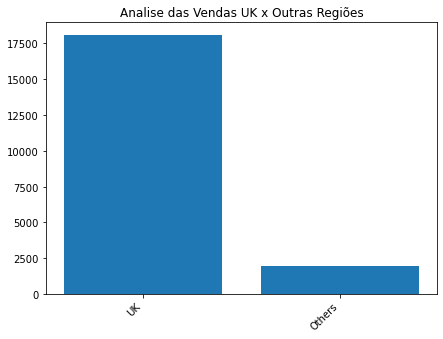

In [23]:
plt.figure( figsize=(7,5) )
plt.title('Analise das Vendas UK x Outras Regiões')
plt.bar( df_countries['Região'].value_counts().index, df_countries['Região'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [24]:
df_uk = df_raw.loc[ (df_raw['Quantidade'] > 0) & (df_raw['Valor'] > 0) & (df_raw['País'] == 'United Kingdom')]
df_uk.describe()

,ID Cliente,Quantidade,Valor,mês,ano,dia
count,16675.000000,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000
mean,15507.517721,258.265282,499.790576,7.378904,2020.919823,2.575748
std,1626.103330,929.259761,1776.102051,3.453841,0.271575,2.060970
min,12346.000000,1.000000,0.380000,1.000000,2020.000000,0.000000
25%,14099.000000,67.000000,147.195000,5.000000,2021.000000,1.000000
50%,15498.000000,146.000000,300.265000,8.000000,2021.000000,2.000000
75%,16923.000000,284.000000,466.712500,11.000000,2021.000000,5.000000
max,18287.000000,80995.000000,168469.600000,12.000000,2021.000000,6.000000


<span style="color:blue">Analisando o desempenho das vendas por período mensal.

In [25]:
vendas_valor_2021 = df_uk[df_uk['ano'] == 2021].groupby('mês')['Valor'].sum()

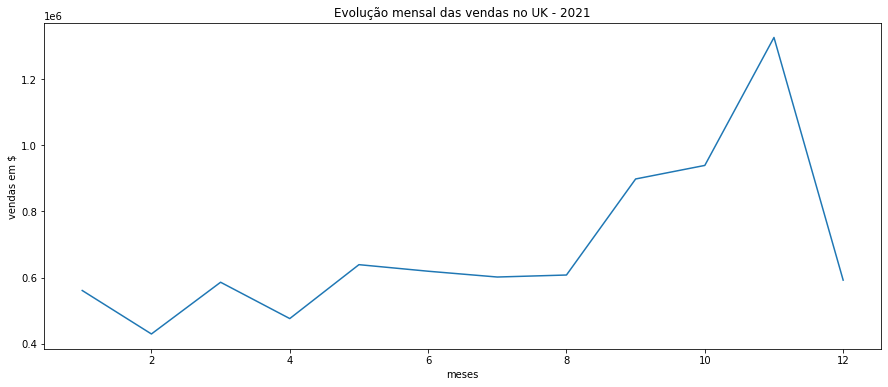

In [26]:
plt.figure( figsize=(15,6) )
plt.plot( vendas_valor_2021 )

plt.title('Evolução mensal das vendas no UK - 2021')
plt.ylabel('vendas em $')

plt.xlabel( 'meses');

<span style="color:blue">Para o ano de 2020 não é possível apresentar evolução de vendas, pois traz apenas 1 período: Dezembro.

In [27]:
uk_2020 = df_uk.loc[ (df_uk['mês'] == 12) & (df_uk['ano'] == 2020)]

In [28]:
uk_2020['mês'].unique()

array([12], dtype=int64)

In [29]:
rank_customer = df_uk[['ID Cliente', 'Valor']].groupby('ID Cliente').aggregate(sum)

In [30]:
# Identificando os clientes com os maiores valores de compra
rank_customer.sort_values(by = ['Valor'], ascending = False)

,Valor
ID Cliente,
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
17511.0,91062.38
16029.0,81024.84
...,...
16878.0,13.30
17956.0,12.75
16454.0,6.90


<span style="color:blue">Análise do ticket médio por período mensal em 2021 para a região de UK nas vendas do ano de 2021.

In [45]:
ticket_2021 = df_uk[df_uk['ano'] == 2021].groupby('mês').aggregate({'Valor': 'sum', 'Quantidade': 'count'})

In [46]:
ticket_2021.head(12)

,Valor,Quantidade
mês,,
1,561289.98,977
2,430027.95,1002
3,586230.28,1314
4,476517.76,1159
5,639314.36,1527
6,619510.67,1384
7,601994.84,1338
8,608047.48,1212
9,898072.19,1648


In [67]:
ticket_2021['ticket'] = ticket_2021.apply(lambda x: x['Valor'] / x['Quantidade'], axis=1)

In [81]:
ticket_2021.reset_index('mês', inplace= True)

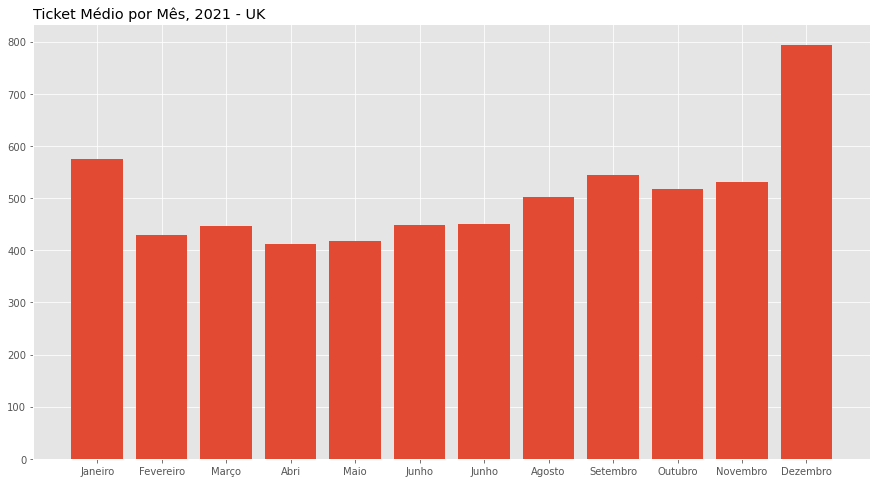

In [90]:
plt.figure( figsize=(15,8) )
label = ('Janeiro', 'Fevereiro', 'Março', 'Abri', 'Maio', 'Junho', 'Junho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro')
plt.title('Ticket Médio por Mês, 2021 - UK', loc='left')
plt.bar( ticket_2021['mês'], ticket_2021['ticket']  )
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12), (label));


In [91]:
ticket_2021.head(12)

,mês,Valor,Quantidade,ticket
0,1,561289.98,977,574.503562
1,2,430027.95,1002,429.169611
2,3,586230.28,1314,446.141766
3,4,476517.76,1159,411.145608
4,5,639314.36,1527,418.673451
5,6,619510.67,1384,447.623316
6,7,601994.84,1338,449.921405
7,8,608047.48,1212,501.689340
8,9,898072.19,1648,544.946717
9,10,938975.01,1812,518.198129
